In [1]:
##Import Data and Required Packages
import pandas as pd
import numpy as np
import xgboost 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv("C:/Users/HP/Documents/backups/boost/train.csv")

In [3]:
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
var_col=[c for c in df_train if c not in ['ID_code','target']]

In [5]:
X = df_train.loc[:, var_col]
y = df_train.loc[:, 'target']

In [6]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [7]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
model_xgboost=xgboost.XGBClassifier(learning_rate=0.1,
                                   max_depth=5,
                                   n_estimators=5000,
                                   subsamples=0.5,
                                   colsample_bytree=0.5,
                                   eval_metric='auc',
                                   verbosity=1)

eval_set=[(X_val,y_val)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "subsamples" } are not used.

[0]	validation_0-auc:0.59940
[1]	validation_0-auc:0.66319
[2]	validation_0-auc:0.67590
[3]	validation_0-auc:0.69505
[4]	validation_0-auc:0.70854
[5]	validation_0-auc:0.71428
[6]	validation_0-auc:0.72305
[7]	validation_0-auc:0.72148
[8]	validation_0-auc:0.73220
[9]	validation_0-auc:0.73314
[10]	validation_0-auc:0.73672
[11]	validation_0-auc:0.74102
[12]	validation_0-auc:0.74349
[13]	validation_0-auc:0.74734
[14]	validation_0-auc:0.75000
[15]	validation_0-auc:0.75463
[16]	validation_0-auc:0.75756
[17]	validation_0-auc:0.75631
[18]	validation_0-auc:0.75852
[19]	validation_0-auc:0.75849
[20]	validation_0-auc:0.76003
[21]	validation_0-auc:0.76227
[22]	validation_0-auc:0.76416
[23]	validation_0-auc:0.76639
[24]	validation_0-auc:0.77147
[25]	validation_0-auc:0.77524
[26]	validation_0-auc:0.77785


[262]	validation_0-auc:0.88276
[263]	validation_0-auc:0.88286
[264]	validation_0-auc:0.88299
[265]	validation_0-auc:0.88301
[266]	validation_0-auc:0.88312
[267]	validation_0-auc:0.88318
[268]	validation_0-auc:0.88332
[269]	validation_0-auc:0.88335
[270]	validation_0-auc:0.88344
[271]	validation_0-auc:0.88347
[272]	validation_0-auc:0.88360
[273]	validation_0-auc:0.88372
[274]	validation_0-auc:0.88373
[275]	validation_0-auc:0.88385
[276]	validation_0-auc:0.88388
[277]	validation_0-auc:0.88391
[278]	validation_0-auc:0.88400
[279]	validation_0-auc:0.88412
[280]	validation_0-auc:0.88423
[281]	validation_0-auc:0.88437
[282]	validation_0-auc:0.88451
[283]	validation_0-auc:0.88459
[284]	validation_0-auc:0.88463
[285]	validation_0-auc:0.88468
[286]	validation_0-auc:0.88473
[287]	validation_0-auc:0.88473
[288]	validation_0-auc:0.88481
[289]	validation_0-auc:0.88482
[290]	validation_0-auc:0.88489
[291]	validation_0-auc:0.88489
[292]	validation_0-auc:0.88494
[293]	validation_0-auc:0.88499
[294]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
y_train_pred=model_xgboost.predict_proba(X_train)[:,1]
y_val_pred=model_xgboost.predict_proba(X_val)[:,1]

In [10]:
print('AUC Train: {:.4f}\nAUC Valid:{:.4f}'.format (roc_auc_score(y_train,y_train_pred),
                                                    roc_auc_score(y_val,y_val_pred)))

AUC Train: 0.9771
AUC Valid:0.8899


In [11]:
learning_rate_list=[0.02,0.05,1]
max_depth_list=[2,3,5]
n_estimators_list=[100,200,300]

param_dict={'learning_rate':learning_rate_list,
            'max_depth':max_depth_list,
            'n_estimators': n_estimators_list}

num_combinations=1

for v in param_dict.values(): num_combinations*=len(v)
    
print(num_combinations)

param_dict

27


{'learning_rate': [0.02, 0.05, 1],
 'max_depth': [2, 3, 5],
 'n_estimators': [100, 200, 300]}

In [12]:
def my_roc_auc_score(model,X,y):
    return roc_auc_score(y,model.predict_proba(X)[:,1])

model_xgboost_hp=GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                     colsample_bytree=0.25,
                                                     eval_metric='auc',
                                                     use_label_encoder=False),
                              
                              param_grid=param_dict,
                              cv=2,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=4)

model_xgboost_hp.fit(X,y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=100;, score=(train=0.744, test=0.725) total time=  38.1s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=100;, score=(train=0.739, test=0.735) total time=  37.6s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.785, test=0.766) total time= 1.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.783, test=0.775) total time=122.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.813, test=0.791) total time= 1.6min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.808, test=0.799) total time= 1.8min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=100;, score=(train=0.779, test=0.753) total time=  52.5s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=100;, score=(train=0.779, test=0.767) total time=  53.6s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=200;, score=(train=0.819, test=0.791) total time= 5.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=200;, score=(train=0.815, test=0.798) total time= 1.7min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=300;, score=(train=0.843, test=0.813) total time= 1.9min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=300;, score=(train=0.838, test=0.820) total time= 1.5min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=100;, score=(train=0.840, test=0.792) total time=  41.7s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=100;, score=(train=0.838, test=0.803) total time=  48.4s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.876, test=0.822) total time= 1.4min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.871, test=0.827) total time= 1.4min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=300;, score=(train=0.900, test=0.839) total time= 2.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=300;, score=(train=0.894, test=0.845) total time= 2.3min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=(train=0.792, test=0.772) total time=  27.2s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=(train=0.795, test=0.786) total time=  26.1s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.839, test=0.816) total time=  50.1s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.838, test=0.825) total time=  53.9s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=300;, score=(train=0.863, test=0.838) total time= 1.3min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=300;, score=(train=0.859, test=0.845) total time= 1.3min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=0.825, test=0.796) total time=  42.2s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=0.826, test=0.808) total time=  37.9s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=(train=0.869, test=0.836) total time= 1.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=(train=0.867, test=0.842) total time= 1.3min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=(train=0.892, test=0.855) total time= 1.8min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=(train=0.888, test=0.860) total time= 1.8min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=(train=0.881, test=0.825) total time= 1.6min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=(train=0.878, test=0.831) total time=  34.3s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.925, test=0.858) total time= 1.1min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.922, test=0.861) total time= 1.1min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=300;, score=(train=0.945, test=0.871) total time= 1.6min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=300;, score=(train=0.943, test=0.875) total time= 1.6min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=100;, score=(train=0.884, test=0.851) total time=  15.8s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=100;, score=(train=0.881, test=0.848) total time=  15.7s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.901, test=0.849) total time=  29.9s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.898, test=0.848) total time=  29.8s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=300;, score=(train=0.908, test=0.843) total time=  46.8s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=300;, score=(train=0.907, test=0.844) total time=  43.6s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=3, n_estimators=100;, score=(train=0.899, test=0.826) total time=  22.1s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=3, n_estimators=100;, score=(train=0.897, test=0.831) total time=  21.3s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=3, n_estimators=200;, score=(train=0.919, test=0.816) total time=  41.1s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=3, n_estimators=200;, score=(train=0.918, test=0.821) total time=  40.9s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=3, n_estimators=300;, score=(train=0.934, test=0.808) total time= 1.0min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=3, n_estimators=300;, score=(train=0.932, test=0.810) total time= 1.0min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=100;, score=(train=0.938, test=0.782) total time=  53.4s


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=100;, score=(train=0.935, test=0.787) total time= 1.0min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.969, test=0.780) total time= 2.7min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.966, test=0.783) total time= 2.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=300;, score=(train=0.984, test=0.779) total time= 8.2min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=300;, score=(train=0.983, test=0.783) total time= 1.6min


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [13]:
df_cv_result=pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_result=df_cv_result[['rank_test_score','mean_test_score','mean_train_score',
                          'param_learning_rate','param_max_depth','param_n_estimators']]
df_cv_result.sort_values(by='rank_test_score',inplace=True)
df_cv_result

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
17,1,0.872828,0.944047,0.05,5,300
16,2,0.859594,0.923165,0.05,5,200
14,3,0.857778,0.890009,0.05,3,300
18,4,0.849936,0.882244,1,2,100
19,5,0.848271,0.899442,1,2,200
20,6,0.843488,0.907702,1,2,300
8,7,0.842276,0.897077,0.02,5,300
11,8,0.841613,0.861223,0.05,2,300
13,9,0.839263,0.867951,0.05,3,200
21,10,0.828369,0.897965,1,3,100


In [14]:
model_xgboost_fin=xgboost.XGBClassifier(learning_rate=0.05,
                                       max_depth=5,
                                       n_estimators=500,
                                       subsample=0.5,
                                       colsample_bytree=0.25,
                                       eval_metric='auc',
                                       verbosity=1,
                                       use_label_encoder=False)

eval_set=[(X_train,y_train),(X_val,y_val)]

model_xgboost_fin.fit(X_train,y_train,
                     early_stopping_rounds=20,
                     eval_set=eval_set,
                     verbose=True)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.58916	validation_1-auc:0.58479
[1]	validation_0-auc:0.64283	validation_1-auc:0.63553
[2]	validation_0-auc:0.68142	validation_1-auc:0.66971
[3]	validation_0-auc:0.71855	validation_1-auc:0.70756
[4]	validation_0-auc:0.73381	validation_1-auc:0.72501
[5]	validation_0-auc:0.74216	validation_1-auc:0.73169
[6]	validation_0-auc:0.74848	validation_1-auc:0.73600
[7]	validation_0-auc:0.75275	validation_1-auc:0.73839
[8]	validation_0-auc:0.76101	validation_1-auc:0.74517
[9]	validation_0-auc:0.76625	validation_1-auc:0.74928
[10]	validation_0-auc:0.76515	validation_1-auc:0.74828
[11]	validation_0-auc:0.76869	validation_1-auc:0.75264
[12]	validation_0-auc:0.77302	validation_1-auc:0.75566
[13]	validation_0-auc:0.78027	validation_1-auc:0.76260
[14]	validation_0-auc:0.78134	validation_1-auc:0.76278
[15]	validation_0-auc:0.78235	validation_1-auc:0.76526
[16]	validation_0-auc:0.78628	validation_1-auc:0.76879
[17]	validation_0-auc:0.79005	validation_1-auc:0.77132
[18]	validation_0-au

[149]	validation_0-auc:0.88845	validation_1-auc:0.84911
[150]	validation_0-auc:0.88881	validation_1-auc:0.84929
[151]	validation_0-auc:0.88907	validation_1-auc:0.84958
[152]	validation_0-auc:0.88948	validation_1-auc:0.84998
[153]	validation_0-auc:0.88997	validation_1-auc:0.85040
[154]	validation_0-auc:0.89044	validation_1-auc:0.85077
[155]	validation_0-auc:0.89105	validation_1-auc:0.85111
[156]	validation_0-auc:0.89161	validation_1-auc:0.85150
[157]	validation_0-auc:0.89187	validation_1-auc:0.85161
[158]	validation_0-auc:0.89236	validation_1-auc:0.85210
[159]	validation_0-auc:0.89277	validation_1-auc:0.85234
[160]	validation_0-auc:0.89309	validation_1-auc:0.85274
[161]	validation_0-auc:0.89330	validation_1-auc:0.85286
[162]	validation_0-auc:0.89325	validation_1-auc:0.85254
[163]	validation_0-auc:0.89371	validation_1-auc:0.85274
[164]	validation_0-auc:0.89386	validation_1-auc:0.85289
[165]	validation_0-auc:0.89430	validation_1-auc:0.85326
[166]	validation_0-auc:0.89473	validation_1-auc:

[296]	validation_0-auc:0.92532	validation_1-auc:0.87552
[297]	validation_0-auc:0.92549	validation_1-auc:0.87558
[298]	validation_0-auc:0.92560	validation_1-auc:0.87564
[299]	validation_0-auc:0.92576	validation_1-auc:0.87574
[300]	validation_0-auc:0.92597	validation_1-auc:0.87586
[301]	validation_0-auc:0.92609	validation_1-auc:0.87598
[302]	validation_0-auc:0.92624	validation_1-auc:0.87603
[303]	validation_0-auc:0.92639	validation_1-auc:0.87616
[304]	validation_0-auc:0.92655	validation_1-auc:0.87620
[305]	validation_0-auc:0.92670	validation_1-auc:0.87629
[306]	validation_0-auc:0.92684	validation_1-auc:0.87632
[307]	validation_0-auc:0.92698	validation_1-auc:0.87639
[308]	validation_0-auc:0.92716	validation_1-auc:0.87659
[309]	validation_0-auc:0.92723	validation_1-auc:0.87661
[310]	validation_0-auc:0.92734	validation_1-auc:0.87672
[311]	validation_0-auc:0.92751	validation_1-auc:0.87687
[312]	validation_0-auc:0.92766	validation_1-auc:0.87689
[313]	validation_0-auc:0.92775	validation_1-auc:

[443]	validation_0-auc:0.94323	validation_1-auc:0.88547
[444]	validation_0-auc:0.94329	validation_1-auc:0.88548
[445]	validation_0-auc:0.94336	validation_1-auc:0.88552
[446]	validation_0-auc:0.94341	validation_1-auc:0.88550
[447]	validation_0-auc:0.94349	validation_1-auc:0.88550
[448]	validation_0-auc:0.94354	validation_1-auc:0.88556
[449]	validation_0-auc:0.94356	validation_1-auc:0.88558
[450]	validation_0-auc:0.94363	validation_1-auc:0.88559
[451]	validation_0-auc:0.94375	validation_1-auc:0.88562
[452]	validation_0-auc:0.94384	validation_1-auc:0.88557
[453]	validation_0-auc:0.94392	validation_1-auc:0.88559
[454]	validation_0-auc:0.94400	validation_1-auc:0.88561
[455]	validation_0-auc:0.94409	validation_1-auc:0.88571
[456]	validation_0-auc:0.94420	validation_1-auc:0.88573
[457]	validation_0-auc:0.94432	validation_1-auc:0.88568
[458]	validation_0-auc:0.94439	validation_1-auc:0.88576
[459]	validation_0-auc:0.94448	validation_1-auc:0.88581
[460]	validation_0-auc:0.94454	validation_1-auc:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
y_train_pred=model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred=model_xgboost_fin.predict_proba(X_val)[:,1]

print('AUC Train :{:.4f}\nAUC Valid: {:.4f}'.format(roc_auc_score(y_train,y_train_pred),
                                                   roc_auc_score(y_val,y_valid_pred)))

AUC Train :0.9477
AUC Valid: 0.8878


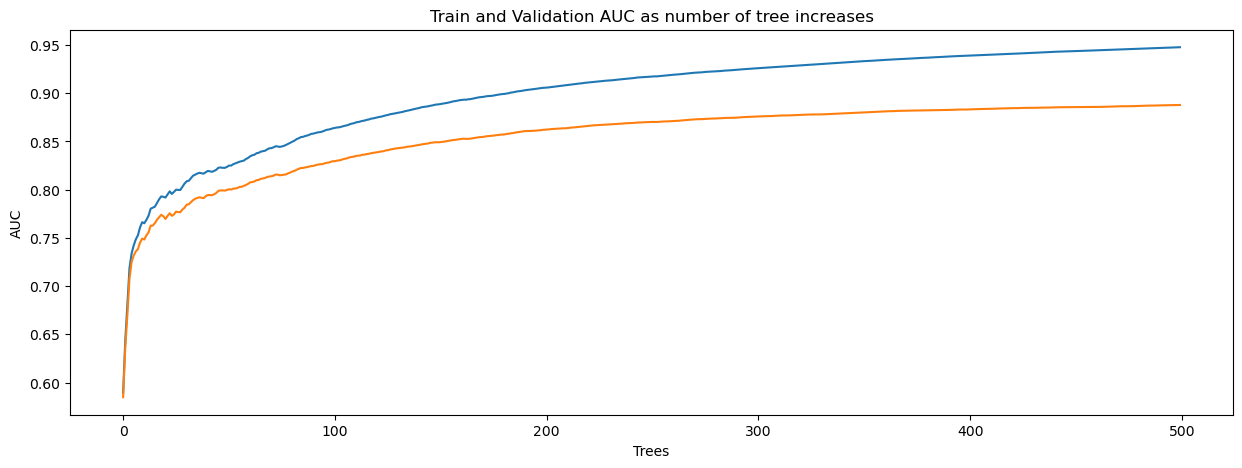

In [16]:
import matplotlib.pyplot as plt
evaluation_result=model_xgboost_fin.evals_result()

train_auc_tree=evaluation_result['validation_0']['auc']
valid_auc_tree=evaluation_result['validation_1']['auc']

plt.figure(figsize=(15,5))

plt.plot(train_auc_tree,label='train')
plt.plot(valid_auc_tree,label='valid')

plt.title('Train and Validation AUC as number of tree increases')
plt.xlabel('Trees')
plt.ylabel('AUC')
plt.show()


In [17]:
df_var_imp=pd.DataFrame({'Variable': var_col,'Importance':model_xgboost_fin.feature_importances_}).sort_values(by='Importance',ascending=False)

df_var_imp[:10]

,Variable,Importance
81,var_81,0.018622
139,var_139,0.014908
12,var_12,0.013342
26,var_26,0.012270
110,var_110,0.011367
53,var_53,0.011223
6,var_6,0.010834
146,var_146,0.010753
22,var_22,0.010698
109,var_109,0.009804


In [18]:
df_test=pd.read_csv('C:/Users/HP/Documents/backups/boost/test.csv')

df_sample_submission=pd.read_csv("C:/Users/HP/Documents/backups/boost/sample_submission.csv")

df_test.shape,df_sample_submission.shape

((200000, 201), (200000, 2))

In [19]:
X_test=df_test.loc[:, var_col]

df_sample_submission['target']=model_xgboost_fin.predict_proba(X_test)[:,1]

In [20]:
df_sample_submission

,ID_code,target
0,test_0,0.087890
1,test_1,0.246366
2,test_2,0.129955
3,test_3,0.115954
4,test_4,0.065017
...,...,...
199995,test_199995,0.063442
199996,test_199996,0.015608
199997,test_199997,0.012154
199998,test_199998,0.079786
